<a href="https://colab.research.google.com/github/swagata87/IITKanpurPhy654/blob/main/XOR_NN_simplePython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np

In [58]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size,)
        #print ('shape of weights_input_hidden ', np.shape(self.weights_input_hidden))
        #print ('shape of weights_hidden_output ', np.shape(self.weights_hidden_output))

        # Initialize the biases
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.bias_output = np.zeros((1, self.output_size))
        #print ('bias_hidden shape ', np.shape(self.bias_hidden))
        #print ('bias_output shape ', np.shape(self.bias_output))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def feedforward(self, X):
        # Input to hidden
        #print ('shape of X', np.shape(X))
        self.hidden_activation = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        #print ('hidden_activation shape ' , np.shape(self.hidden_activation))
        self.hidden_output = self.sigmoid(self.hidden_activation)

        # Hidden to output
        self.output_activation = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        #print ('output_activation shape ' , np.shape(self.output_activation))
        self.predicted_output = self.sigmoid(self.output_activation)

        return self.predicted_output

    def backward(self, X, y, learning_rate):
        # Compute the output layer error (simple loss)
        output_error = y - self.predicted_output
        output_delta = output_error * self.sigmoid_derivative(self.predicted_output)

        # Compute the hidden layer error
        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_output)

        # Update weights and biases
        self.weights_hidden_output += np.dot(self.hidden_output.T, output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += np.dot(X.T, hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            output = self.feedforward(X)
            self.backward(X, y, learning_rate)
            if epoch % 1000 == 0:
                loss = np.mean(np.square(y - output))
                print('Epoch ', {epoch}, 'Loss ', {loss})


In [52]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

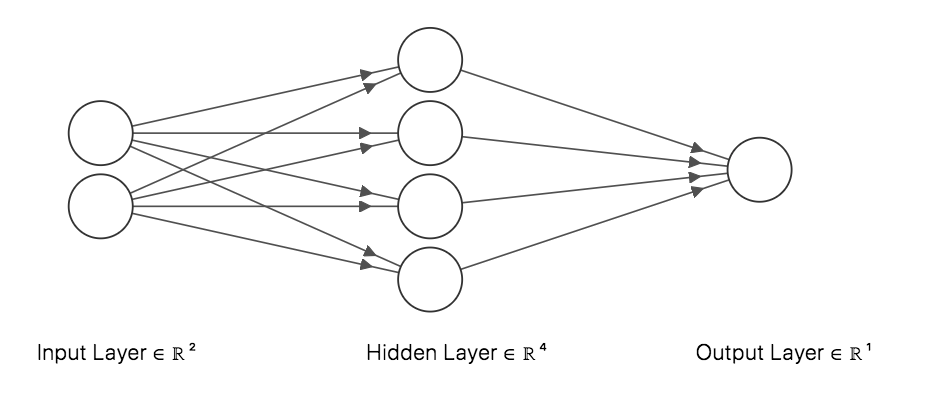

In [59]:
nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)
nn.train(X, y, epochs=1, learning_rate=0.1)

shape of weights_input_hidden  (2, 4)
shape of weights_hidden_output  (4, 1)
bias_hidden shape  (1, 4)
bias_output shape  (1, 1)
shape of X (4, 2)
hidden_activation shape  (4, 4)
output_activation shape  (4, 1)
Epoch  {0} Loss  {0.30594992659263176}


**After training, the neural network is tested on the XOR dataset (X) to see how well it has learned the XOR function**

In [49]:
# Test the trained model
output = nn.feedforward(X)
print('Predictions after training: ')
print(output)

Predictions after training: 
[[0.04095807]
 [0.95376543]
 [0.95422898]
 [0.05591805]]
